## Lab Exame - CMC-13
### Equipe:


### 1. Preparação dos dados

In [57]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

train_dataset = pd.read_csv('./apartments_for_rent_train.csv',sep=',')
test_dataset = pd.read_csv('./apartments_for_rent_test.csv',sep=',')

In [58]:
train_dataset.columns

Index(['Unnamed: 0', 'id', 'category', 'title', 'body', 'amenities',
       'bathrooms', 'bedrooms', 'currency', 'fee', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [59]:
train_dataset['amenities'].unique()[25:35]

array(['Cable or Satellite,Dishwasher,Garbage Disposal,Internet Access,Parking,Pool,Refrigerator',
       'Cable or Satellite,Dishwasher,Garbage Disposal,Internet Access,Parking,Refrigerator',
       'Cable or Satellite,Pool,Refrigerator,Storage,TV',
       'Cable or Satellite,Elevator,Garbage Disposal,Parking,Refrigerator,Storage',
       'Cable or Satellite,Elevator,Garbage Disposal,Internet Access,Parking,Patio/Deck,Refrigerator',
       'Dishwasher,Garbage Disposal,Parking,Refrigerator',
       'Cable or Satellite,Dishwasher,Garbage Disposal,Parking,Pool,Refrigerator',
       'Dishwasher,Garbage Disposal,Parking,Refrigerator,Storage',
       'Basketball,Cable or Satellite,Clubhouse,Dishwasher,Garbage Disposal,Hot Tub,Internet Access,Parking,Pool,Refrigerator,Tennis',
       'Dishwasher,Parking,Refrigerator'], dtype=object)

In [60]:
train_dataset.dropna(inplace=True)

In [61]:
train_dataset.dtypes

Unnamed: 0         int64
id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude         object
source            object
time             float64
dtype: object

In [62]:
# criando colunas para 'AC', 'Parking' e 'Pool'
train_dataset['Pool'] = train_dataset['amenities'].str.contains('Pool', case=1, na=0)
train_dataset['AC'] = train_dataset['amenities'].str.contains('AC', case=1, na=0)
train_dataset['Parking'] = train_dataset['amenities'].str.contains('Parking', case=1, na=0)
train_dataset['Hot_tub'] = train_dataset['amenities'].str.contains('Hot Tub',case=1,na=0)

# Criando colunas para verificar se aceitam gatos ou cachorros
train_dataset['Cats'] = train_dataset['pets_allowed'].str.contains('Cats',case=1,na=0)
train_dataset['Dogs'] = train_dataset['pets_allowed'].str.contains('Dogs',case=1,na=0)

In [63]:
train_dataset['currency'].unique()

array(['USD'], dtype=object)

In [64]:
train_dataset['fee'].unique()

array(['No'], dtype=object)

In [65]:
train_dataset['category'].unique()

array(['housing/rent/apartment'], dtype=object)

In [66]:
train_dataset['latitude'] = train_dataset['latitude']/10

In [67]:
def processar_longitude(valor):
    valor = valor.replace('.','')
    valor = float(valor)/10000
    return valor

# ajustando as longitudes
train_dataset['longitude'] = train_dataset['longitude'].apply(processar_longitude)

C:\Users\rafae\AppData\Local\Temp\ipykernel_5096\959173669.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


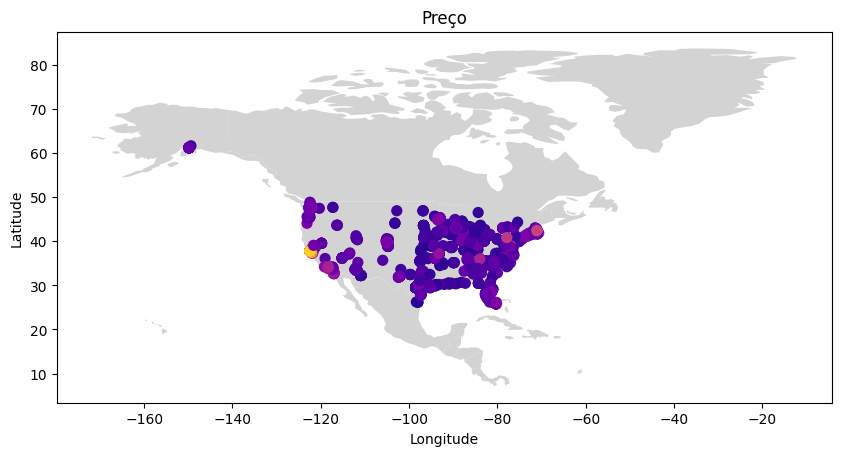

In [68]:
# Gráfico de latitude/longitude
# Criar uma GeoDataFrame
gdf = gpd.GeoDataFrame(train_dataset, geometry=gpd.points_from_xy(train_dataset.longitude, train_dataset.latitude))

# Plotar o mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == 'North America']

fig, ax = plt.subplots(figsize=(10, 6))
north_america.plot(ax=ax, color='lightgrey')

# Plotar os pontos
gdf.plot(ax=ax, column=train_dataset['price'] , cmap='plasma', markersize=50)

# Adicionar labels
# for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['cidade']):
#     plt.text(x, y, label, fontsize=12)

plt.title('Preço')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Com a latitude e longitude separadas é possível desconsiderar as variáveis cidade e estado pois as informações de posição geográfica já estarão contempladas.

c:\Users\rafae\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


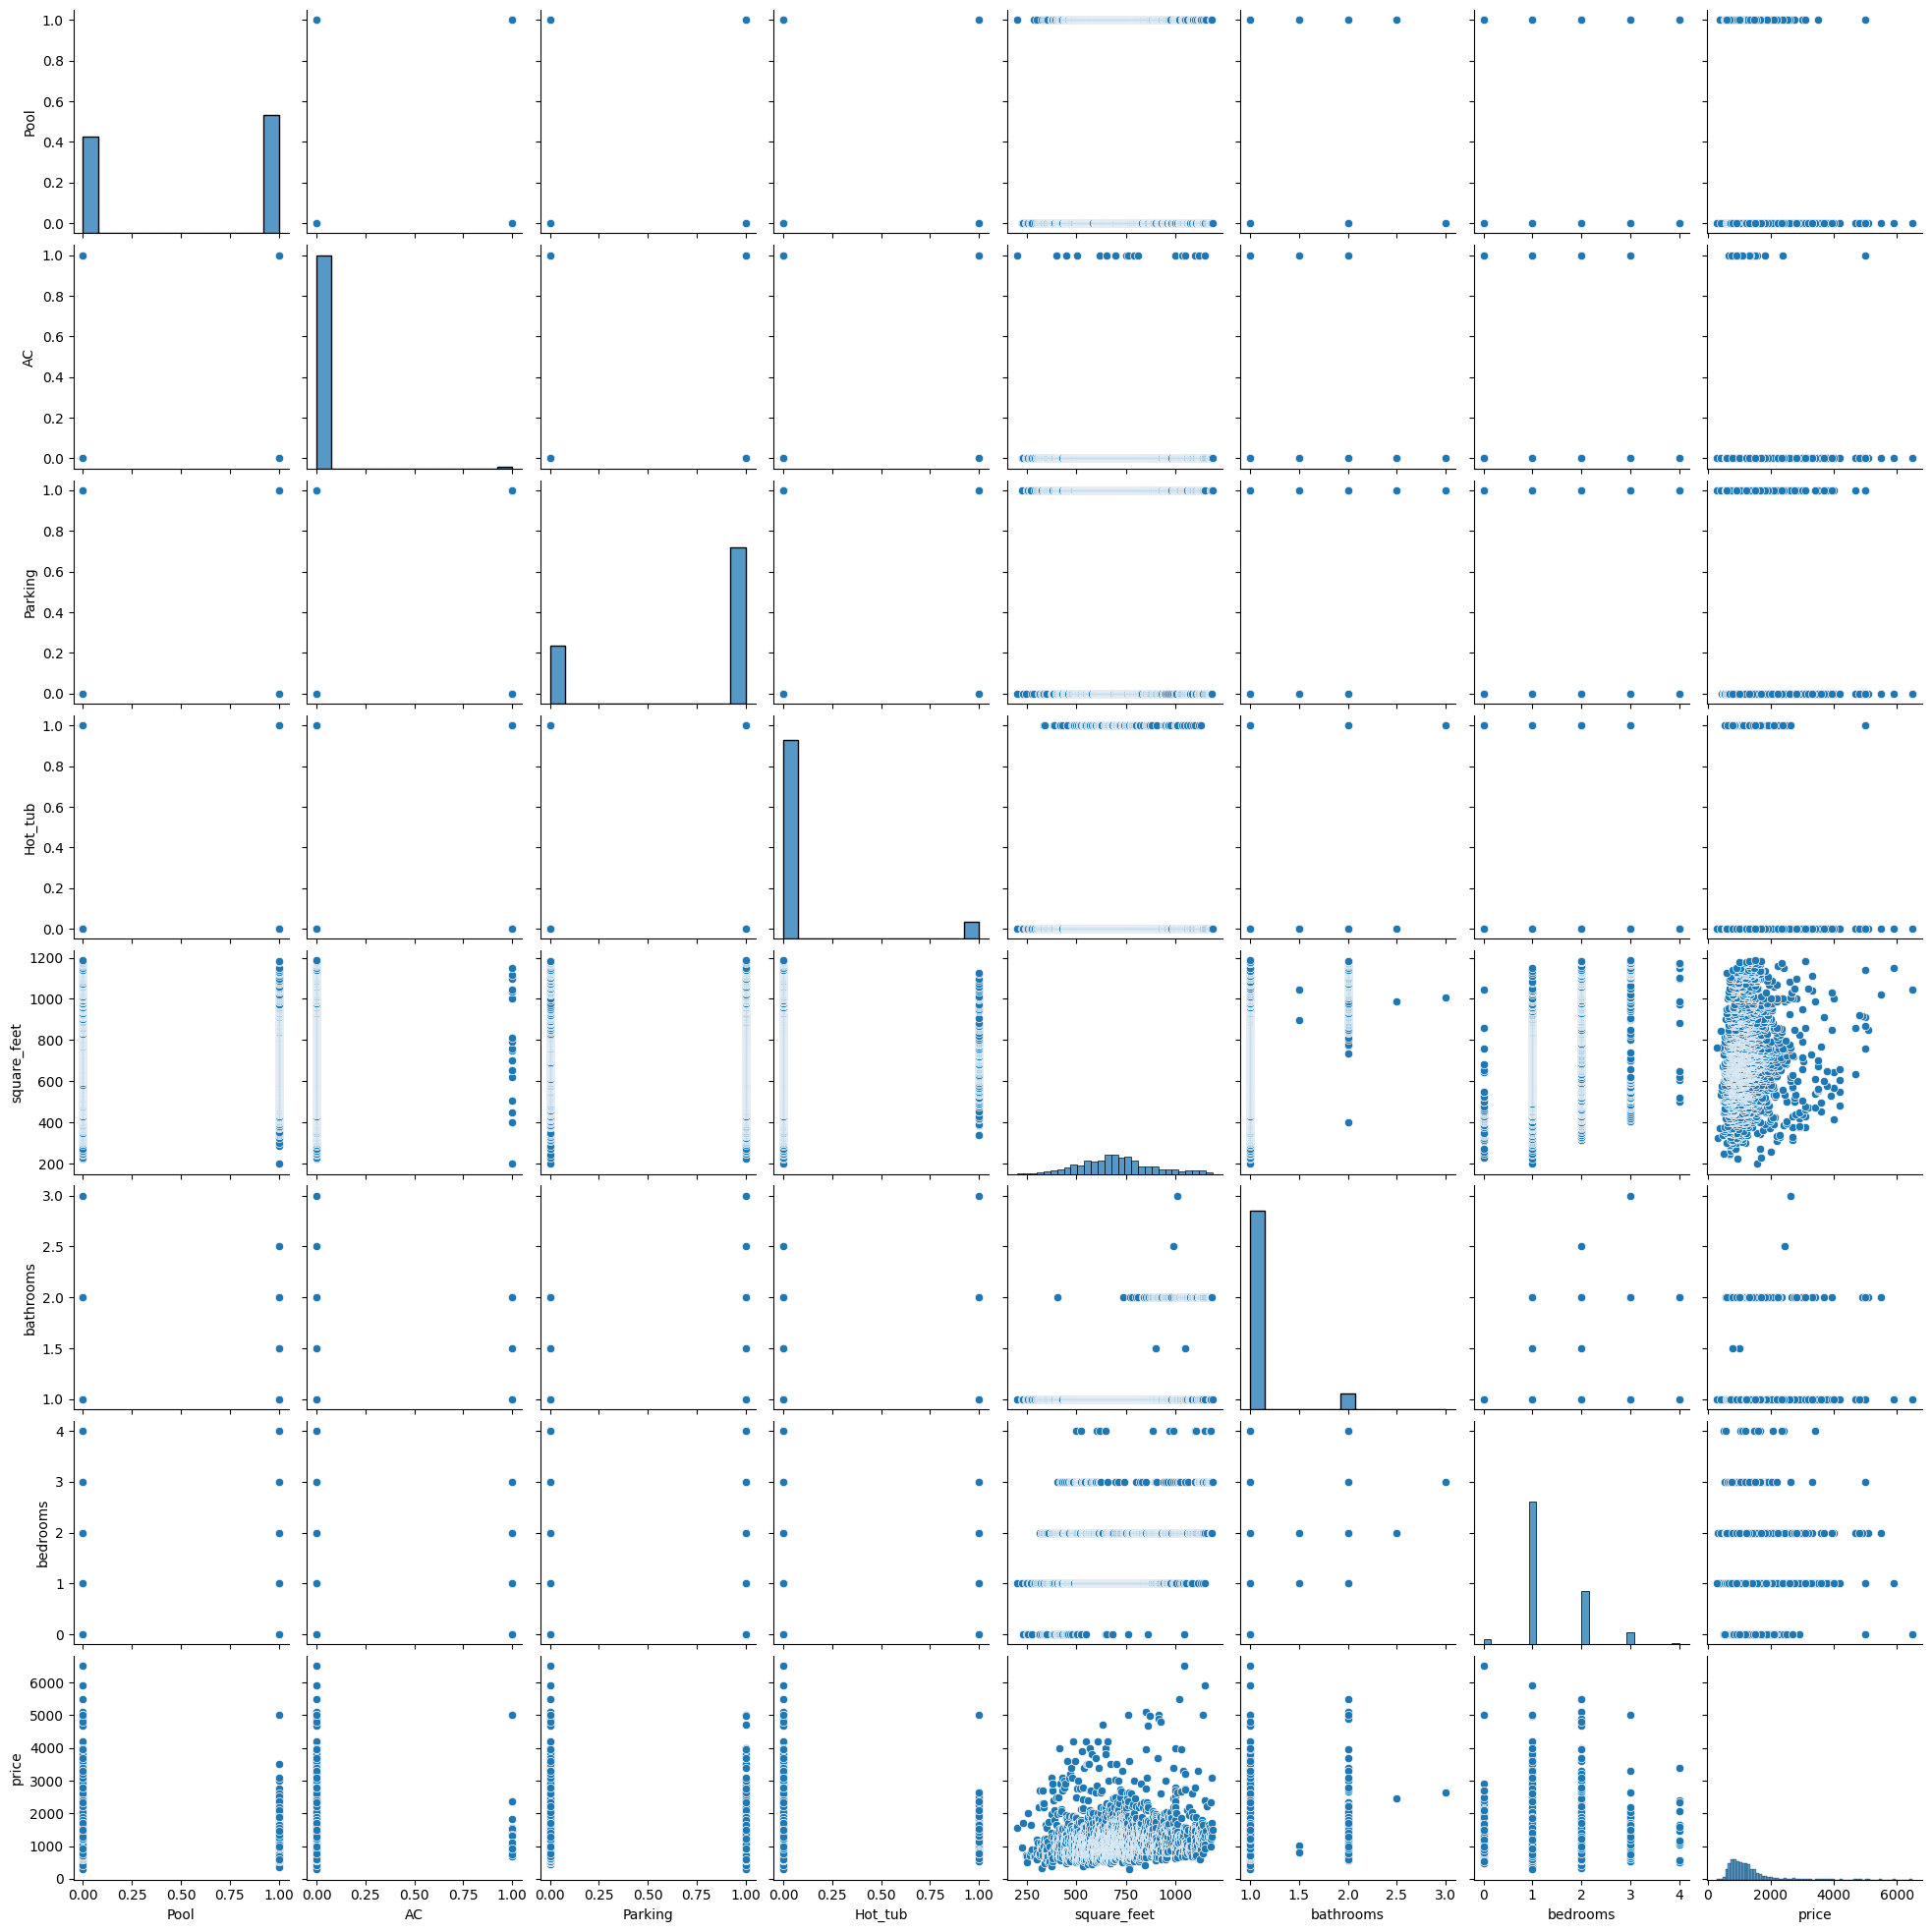

In [69]:
sns.pairplot(train_dataset[['Pool','AC','Parking','Hot_tub','square_feet','bathrooms','bedrooms','price']])

c:\Users\rafae\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


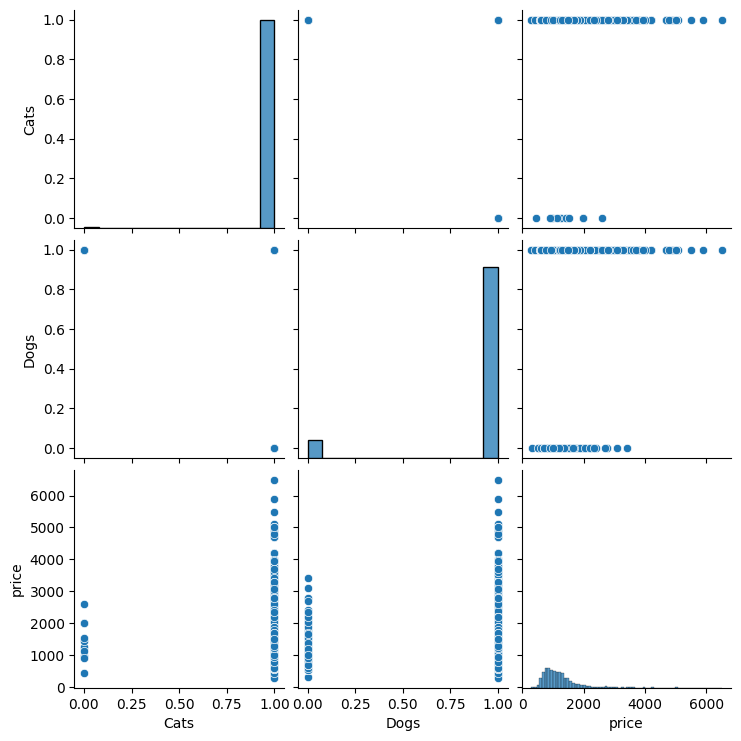

In [70]:
sns.pairplot(train_dataset[['Cats','Dogs','price']])

Percebe-se que tanto imóveis que aceitam gatos quanto imóveis que aceitam cachorros tendem a ter preços maiores.

In [71]:
train_dataset['source'].unique()

array(['RentDigs.com', 'RentLingo', 'RENTOCULAR', 'rentbits',
       'tenantcloud'], dtype=object)

In [72]:
train_dataset.groupby('source',axis=0)['price'].describe()

C:\Users\rafae\AppData\Local\Temp\ipykernel_5096\1994985304.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  train_dataset.groupby('source',axis=0)['price'].describe()


,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
RENTOCULAR,1.0,1295.000000,NaN,1295.0,1295.0,1295.0,1295.0,1295.0
RentDigs.com,24.0,1425.958333,967.587834,675.0,871.0,1024.0,1624.5,5000.0
RentLingo,2101.0,1232.219419,630.144195,288.0,835.0,1093.0,1409.0,6500.0
rentbits,2.0,1045.000000,70.710678,995.0,1020.0,1045.0,1070.0,1095.0
tenantcloud,1.0,750.000000,NaN,750.0,750.0,750.0,750.0,750.0


Apesar de existirem diferenças nos preços de fontes distintas, são poucas observações de fontes diferentes de 'RentLingo'. Assim, esse atributo será desconsiderado.

Unnamed: 0         int64
id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude         object
source            object
time             float64

In [74]:
train_dataset = pd.read_csv('./apartments_for_rent_train.csv')

# Excluindo valores inexistentes
train_dataset.dropna(inplace=True)

# criando colunas para 'AC', 'Parking' e 'Pool'
train_dataset['Pool'] = train_dataset['amenities'].str.contains('Pool', case=1, na=0)
train_dataset['AC'] = train_dataset['amenities'].str.contains('AC', case=1, na=0)
train_dataset['Parking'] = train_dataset['amenities'].str.contains('Parking', case=1, na=0)
train_dataset['Hot_tub'] = train_dataset['amenities'].str.contains('Hot Tub',case=1,na=0)

# Processando latitude e longitude
train_dataset['latitude'] = train_dataset['latitude']/10
train_dataset['longitude'] = train_dataset['longitude'].apply(processar_longitude)

# Criando colunas para verificar se aceitam gatos ou cachorros
train_dataset['Cats'] = train_dataset['pets_allowed'].str.contains('Cats',case=1,na=0)
train_dataset['Dogs'] = train_dataset['pets_allowed'].str.contains('Dogs',case=1,na=0)

# Excluindo colunas desnecessarias
train_dataset.drop(['Unnamed: 0','id','category','title','body','amenities','pets_allowed','currency','fee','price_display','price_type','address','cityname','state','source','time'],inplace=True,axis=1)
train_dataset

,bathrooms,bedrooms,price,square_feet,latitude,longitude,Pool,AC,Parking,Hot_tub,Cats,Dogs
16,1.0,1.0,1560,200,35.0960,-77.0272,True,True,False,False,True,True
40,1.0,1.0,942,225,41.8625,-87.6825,False,False,True,False,True,False
46,1.0,0.0,1695,232,37.7599,-122.4379,False,False,False,False,True,True
50,1.0,1.0,705,245,61.1723,-149.8414,False,False,False,False,True,True
146,1.0,0.0,695,250,42.5286,-92.4509,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7970,2.0,3.0,1399,1182,35.2016,-80.8124,False,False,False,False,True,True
7971,2.0,3.0,1300,1182,36.1554,-115.1733,False,False,False,False,True,True
7974,2.0,2.0,3080,1183,40.7985,-77.8612,True,False,True,False,True,True
7986,2.0,2.0,1700,1185,47.4081,-122.3162,False,False,False,False,True,True
